Import Library

In [ ]:
import pandas as pd
import re

Read Dataset

In [19]:
df = pd.read_csv("/kaggle/input/labelclassification/reviewsDataset.csv")
df.head()

,reviewContent,ground_truth_aspects
0,"আলহামদুলিল্লাহ, প্রোডাক্টটি অনেক ভালো! সাউন্ড ...","product, packaging"
1,"অসাধারণ একটা প্রডাক্ট হাতে পেলাম,সত্যিই অসাধার...","product, seller, packaging"
2,আসা করি যে ভালো হবে কিন্তু অনেক ভালো ছিল চালে ...,"product, seller"
3,"যেমন ওর্ডার করেছি তেমন পেয়েছি,প্যাকেটিং ভালো ছ...","product, packaging, seller"
4,১০০% আসল প্রোডাক্ট। সিলেটের মধ্যে ৮ দিনের মধ্য...,"product, delivery, seller"


In [20]:
df.reviewContent[617]

'রাইডার ভালো 👍'

In [21]:
df.sample(40)

,reviewContent,ground_truth_aspects
712,"সব সময় এখান থেকে কিনি, ছবির মতো, সুন্দর পণ্য ...","product, delivery"
250,ও আমার ঈশ্বর 😊😊 এই পণ্যের জন্য এতো সুন্দর বক্স...,"product, packaging"
133,প্রোডাক্টটা অনেক ভালো। আমি অ্যালার্মের জন্য কি...,product
682,পেকেটের অবস্থা খুব বেশি খারাপ হয়ে গিয়েছে। ☹️,packaging
1558,সব ঠিক ঠাক ছিলো... ভালো ছিলো।,NaN
1450,ভালো জিনিসগুলোর জন্য কৃতজ্ঞ থাকুন।,NaN
1324,উপহারের জন্য ধন্যবাদ.. 😀,NaN
627,ভালো পণ্য।,product
62,ব্যাটারি ব্যাকআপ খুব খারাপ বেশিক্ষণ অন থাকে না...,"product, packaging"
1628,আলহামদুলিল্লাহ একদম ঠিক পন্য পেয়েছি সাথে দুইটা...,"product, seller"


Clean Text

In [22]:
def clean_text(text):
    # Regular expression to match only Bengali characters, digits, and special characters
    pattern = re.compile(r'[^০-৯\u0980-\u09FF\s,.!?\'"@#$%^&*()_+=\-`~<>:;"{}[\]\\|/]')
    filtered_string = pattern.sub('', text)
    output_string = re.sub(r'\s+', ' ', filtered_string).strip()
    return output_string

# Apply the function to the 'text' column
df['reviewContent'] = df['reviewContent'].apply(clean_text)

df.sample(50)

,reviewContent,ground_truth_aspects
1355,পুরোপুরি প্রতারণা টিনের কৌটার কফির দাম যেটা অফ...,"product, price"
1240,"শীর্ষ মানের পণ্য, ৩ দিনের মধ্যে ডেলিভারি করা হ...","product, delivery"
379,খুব ভালো গুণগতমানের পণ্য ধন্যবাদ দারাজ এবং বিক...,"product, seller"
1470,"পণ্যের মান, দাম এবং ডেলিভারির সময় - সবকিছুই অ...","product, delivery, seller, price"
661,দাজার থেকে কেনাকাটা করার মত সস্তি আর শান্তি আপ...,"product, delivery, packaging, seller"
782,ভাউচার ক্যাশ ব্যাক ফ্রি ডেলিভারি মিলিয়ে প্রতি ...,"delivery, price"
1061,"""সবকিছু ঠিক আছে""",NaN
1395,ভালো অবস্থায় পেয়েছি দ্রুত ডেলিভারি,delivery
1237,আসল পণ্য এবং মেয়াদ উত্তীর্ণের তারিখসহ ধন্যবাদ...,"product, shelf"
1446,পণ্য ও প্যাকেজিং খুব ভালো,"product, packaging"


In [23]:
df.shape

(1648, 2)

Drop Null Value

In [24]:
df = df.dropna()

In [25]:
df.shape

(1581, 2)

Preprocess the Dataset

In [26]:
# Create a set to hold unique aspects
unique_aspects = set()

# Split the aspects and update the unique_aspects set
df['ground_truth_aspects'].str.split(', ').apply(unique_aspects.update)

# Strip spaces from unique aspects and remove any empty strings
unique_aspects = {aspect.strip() for aspect in unique_aspects if aspect.strip()}

# Create a new column for each unique aspect and initialize with 0
for aspect in unique_aspects:
    df[aspect] = 0

# Populate the columns based on the aspects present in each row
for index, row in df.iterrows():
    aspects = [aspect.strip() for aspect in row['ground_truth_aspects'].split(', ')]
    for aspect in aspects:
        if aspect:  # only update if aspect is not an empty string
            df.at[index, aspect] = 1

In [27]:
df.head()

,reviewContent,ground_truth_aspects,packaging,rider,seller,"seller,shelf",price,packaging product,delivery,service,shelf,product,"product,price"
0,"আলহামদুলিল্লাহ, প্রোডাক্টটি অনেক ভালো! সাউন্ড ...","product, packaging",1,0,0,0,0,0,0,0,0,1,0
1,"অসাধারণ একটা প্রডাক্ট হাতে পেলাম,সত্যিই অসাধার...","product, seller, packaging",1,0,1,0,0,0,0,0,0,1,0
2,আসা করি যে ভালো হবে কিন্তু অনেক ভালো ছিল চালে ...,"product, seller",0,0,1,0,0,0,0,0,0,1,0
3,"যেমন ওর্ডার করেছি তেমন পেয়েছি,প্যাকেটিং ভালো ছ...","product, packaging, seller",1,0,1,0,0,0,0,0,0,1,0
4,১০০% আসল প্রোডাক্ট সিলেটের মধ্যে ৮ দিনের মধ্যে...,"product, delivery, seller",0,0,1,0,0,0,1,0,0,1,0


In [28]:
df.columns

Index(['reviewContent', 'ground_truth_aspects', 'packaging', 'rider', 'seller',
       'seller,shelf', 'price', 'packaging  product', 'delivery', 'service',
       'shelf', 'product', 'product,price'],
      dtype='object')

Drop some Columns

In [29]:
drop_columns = ["ground_truth_aspects", "packaging  product", "seller,shelf", "product,price"]
df = df.drop(columns=drop_columns, axis = 1)

In [30]:
df.head()

,reviewContent,packaging,rider,seller,price,delivery,service,shelf,product
0,"আলহামদুলিল্লাহ, প্রোডাক্টটি অনেক ভালো! সাউন্ড ...",1,0,0,0,0,0,0,1
1,"অসাধারণ একটা প্রডাক্ট হাতে পেলাম,সত্যিই অসাধার...",1,0,1,0,0,0,0,1
2,আসা করি যে ভালো হবে কিন্তু অনেক ভালো ছিল চালে ...,0,0,1,0,0,0,0,1
3,"যেমন ওর্ডার করেছি তেমন পেয়েছি,প্যাকেটিং ভালো ছ...",1,0,1,0,0,0,0,1
4,১০০% আসল প্রোডাক্ট সিলেটের মধ্যে ৮ দিনের মধ্যে...,0,0,1,0,1,0,0,1


In [31]:
df.columns

Index(['reviewContent', 'packaging', 'rider', 'seller', 'price', 'delivery',
       'service', 'shelf', 'product'],
      dtype='object')

In [32]:
columns = ['seller', 'delivery', 'service', 'price', 'packaging',
       'shelf', 'rider', 'product']

In [33]:
df.service.value_counts()

service
0    1393
1     188
Name: count, dtype: int64

Plot Each aspect number of class Frequency

In [34]:
import plotly.express as px

def plot_value_counts(df, column_name):
    # Get value counts
    value_counts = df[column_name].value_counts().reset_index()
    value_counts.columns = [column_name, 'count']

    # Create bar plot with different colors
    fig_bar = px.bar(value_counts, x=column_name, y='count', 
                     color=column_name, 
                     labels={column_name:'Value', 'count':'Count'},
                     title=f'{column_name.capitalize()} Value Counts')

    # Update the layout for better visualization
    fig_bar.update_layout(showlegend=False)

    fig_bar.show()

    # Create pie chart
    fig_pie = px.pie(value_counts, names=column_name, values='count', 
                     title=f'{column_name.capitalize()} Value Counts Distribution')

    fig_pie.show()

# Example usage:
for col in columns:
    plot_value_counts(df, col)


In [35]:
df.reviewContent[2]

'আসা করি যে ভালো হবে কিন্তু অনেক ভালো ছিল চালে নিতে পারেন যে রকম কথা ছিল সেই রকম দিসে ধ্যনবাদ দারাজ এবং সেলার'

Split the Dataset

In [36]:
from sklearn.model_selection import train_test_split
# split into train and test
df_train, df_test = train_test_split(df, random_state=77, test_size=0.3, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.3, shuffle=True)

In [37]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (1106, 9), Test: (332, 9), Valid: (143, 9)


Hyperparameters

In [38]:
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-05
THRESHOLD = 0.5 # threshold for the sigmoid
     

Library for BERT Model

In [39]:
from transformers import BertTokenizer, BertModel

import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Tokenizer

In [40]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [41]:
# Test the tokenizer
test_text = "আলহামদুলিল্লাহ, প্রোডাক্টটি অনেক ভালো! সাউন্ড চেক করে দেখলাম অনেক ভালই! আপনার চোখ বন্ধ করে ভরসা করে নিতে পারেন! প্রোডাক্টটি যখন আমার হাতে এসেছিল তখন ইনটেক ছিল!"
# generate encodings
encodings = tokenizer.encode_plus(test_text, 
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length", 
                                  return_attention_mask = True, 
                                  return_tensors = "pt")
# we get a dictionary with three keys (see: https://huggingface.co/transformers/glossary.html) 
encodings
     

{'input_ids': tensor([[  101,  1348, 29909, 29913, 29914, 29906, 29900, 29909, 29915, 29909,
         29909, 29914, 29913,  1010,  1367, 29908, 29917, 29914, 29896, 29914,
         29889, 29895, 29895, 29915,  1347, 29902, 29917, 29889,  1369, 29914,
         29909, 29917, 29914,   999,  1376, 29914, 29886, 29902, 29896,  1356,
         29917, 29889,  1353, 29908, 29917,  1364, 29917, 29890, 29909,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]])}

In [42]:
df_train['reviewContent']

1359    "পণ্য ও গুণমান খুব ভালো মনে হয় আমার কাছে, আপন...
672     আলহামদুলিল্লাহ্ সব দিকেই পারফেক্ট ছিলো সবাই নি...
736               নতুন উৎপাদিত প্রোডাক্ট থ্যাংকস টু সেলার
966     প্রোডাক্ট সম্পর্কে বলার কিছুই নাই, কারণ আমার স...
223     আলহামদুলিল্লাহ ভালো মতই পেয়েছি আমি সবসময় দারাজ...
                              ...                        
936     শেষমেশ কন্টেইনারসহ দেওয়া হয়েছে, প্রথমে বলছিল...
1358    কফি অসাধারণ ছিল কন্টেইনার এর লোভে নেওয়া তবে কন...
236     রিভিউ করেছেন লিমন আজাদ (সানি) প্রোডাক্টটি অনেক...
608                               খুব সুন্দর এবং সুস্বাদু
729                                    অরিজিনাল পণ্য গুলো
Name: reviewContent, Length: 1106, dtype: object

In [43]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.title = list(df['reviewContent'])
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'title': title
        }
     

In [44]:
target_list = list(df.columns)
target_list

['reviewContent',
 'packaging',
 'rider',
 'seller',
 'price',
 'delivery',
 'service',
 'shelf',
 'product']

In [45]:
target_list = target_list[1:]

In [46]:
target_list

['packaging',
 'rider',
 'seller',
 'price',
 'delivery',
 'service',
 'shelf',
 'product']

In [47]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [48]:
# testing the dataset
next(iter(train_dataset))

{'input_ids': tensor([  101,  1000,  1367, 29897, 29907,  1352,  1355, 29897, 29906, 29914,
         29902,  1354, 29904,  1369, 29914, 29909, 29917, 29914,  1370, 29902,
         29917,  1377, 29907,  1348, 29906, 29914, 29908,  1353, 29914, 29893,
         29917,  1010,  1348, 29903, 29902, 29915,  1371, 29900, 29915,  1351,
         29885,  1367, 29897, 29907, 29895, 29915,  1353, 29915, 29902, 29898,
         29917,  1356, 29914, 29902,  1000,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

 Data loaders

In [49]:

train_data_loader = torch.utils.data.DataLoader(train_dataset, 
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset, 
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [50]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 8)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids, 
            attention_mask=attn_mask, 
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

Loss Function

In [51]:

def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

Optimizer

In [52]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)         
     

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [53]:
# Training of the model for one epoch
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to training mode (activate droput, batch norm)
    model.train()
    # initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader), 
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        # forward
        outputs = model(ids, mask, token_type_ids) # (batch,predict)=(32,8)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        # training accuracy, apply sigmoid, round (apply thresh 0.5)
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs==targets)
        num_samples += targets.size   # total number of elements in the 2D array

        # backward
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # grad descent step
        optimizer.step()


    # returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions)/num_samples, np.mean(losses)

Model Evaluation Function

In [54]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs==targets)
            num_samples += targets.size   # total number of elements in the 2D array

    return float(correct_predictions)/num_samples, np.mean(losses)

**Model Training**

In [55]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    # save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), "BERT_MODEL.bin")
        best_accuracy = val_acc
        
# https://github.com/dtolk/multilabel-BERT/blob/master/notebooks/multi_label_text_classification_BERT.ipynb

Epoch 1/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.5155, val_loss=0.4463 train_acc=0.8055, val_acc=0.8269
Epoch 2/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.4455, val_loss=0.4252 train_acc=0.8278, val_acc=0.8269
Epoch 3/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.4298, val_loss=0.4145 train_acc=0.8288, val_acc=0.8269
Epoch 4/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.4198, val_loss=0.4076 train_acc=0.8275, val_acc=0.8269
Epoch 5/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.4080, val_loss=0.3934 train_acc=0.8288, val_acc=0.8269
Epoch 6/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.3902, val_loss=0.3643 train_acc=0.8366, val_acc=0.8531
Epoch 7/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.3635, val_loss=0.3515 train_acc=0.8544, val_acc=0.8680
Epoch 8/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.3477, val_loss=0.3392 train_acc=0.8628, val_acc=0.8715
Epoch 9/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.3265, val_loss=0.3216 train_acc=0.8762, val_acc=0.8741
Epoch 10/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.3057, val_loss=0.3081 train_acc=0.8884, val_acc=0.8820
Epoch 11/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2910, val_loss=0.2977 train_acc=0.8965, val_acc=0.8934
Epoch 12/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2723, val_loss=0.2898 train_acc=0.9061, val_acc=0.8977
Epoch 13/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2557, val_loss=0.2761 train_acc=0.9156, val_acc=0.8977
Epoch 14/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2426, val_loss=0.2689 train_acc=0.9211, val_acc=0.9056
Epoch 15/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2291, val_loss=0.2623 train_acc=0.9270, val_acc=0.9082
Epoch 16/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2138, val_loss=0.2495 train_acc=0.9359, val_acc=0.9091
Epoch 17/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.2058, val_loss=0.2503 train_acc=0.9396, val_acc=0.9100
Epoch 18/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1939, val_loss=0.2449 train_acc=0.9433, val_acc=0.9161
Epoch 19/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1830, val_loss=0.2417 train_acc=0.9479, val_acc=0.9161
Epoch 20/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1711, val_loss=0.2334 train_acc=0.9529, val_acc=0.9152
Epoch 21/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1629, val_loss=0.2329 train_acc=0.9568, val_acc=0.9161
Epoch 22/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1532, val_loss=0.2338 train_acc=0.9606, val_acc=0.9152
Epoch 23/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1479, val_loss=0.2282 train_acc=0.9637, val_acc=0.9170
Epoch 24/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1368, val_loss=0.2288 train_acc=0.9679, val_acc=0.9196
Epoch 25/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1309, val_loss=0.2235 train_acc=0.9725, val_acc=0.9222
Epoch 26/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1238, val_loss=0.2254 train_acc=0.9742, val_acc=0.9178
Epoch 27/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1177, val_loss=0.2163 train_acc=0.9741, val_acc=0.9231
Epoch 28/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1095, val_loss=0.2238 train_acc=0.9788, val_acc=0.9170
Epoch 29/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.1054, val_loss=0.2268 train_acc=0.9815, val_acc=0.9213
Epoch 30/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0979, val_loss=0.2179 train_acc=0.9827, val_acc=0.9213
Epoch 31/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0935, val_loss=0.2244 train_acc=0.9837, val_acc=0.9196
Epoch 32/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0902, val_loss=0.2173 train_acc=0.9849, val_acc=0.9248
Epoch 33/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0853, val_loss=0.2114 train_acc=0.9870, val_acc=0.9248
Epoch 34/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0804, val_loss=0.2259 train_acc=0.9871, val_acc=0.9178
Epoch 35/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0749, val_loss=0.2220 train_acc=0.9882, val_acc=0.9248
Epoch 36/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0700, val_loss=0.2156 train_acc=0.9910, val_acc=0.9257
Epoch 37/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0671, val_loss=0.2165 train_acc=0.9917, val_acc=0.9222
Epoch 38/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0639, val_loss=0.2082 train_acc=0.9931, val_acc=0.9301
Epoch 39/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0609, val_loss=0.2255 train_acc=0.9919, val_acc=0.9213
Epoch 40/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0571, val_loss=0.2233 train_acc=0.9940, val_acc=0.9178
Epoch 41/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0548, val_loss=0.2218 train_acc=0.9942, val_acc=0.9170
Epoch 42/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0518, val_loss=0.2195 train_acc=0.9950, val_acc=0.9248
Epoch 43/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0505, val_loss=0.2120 train_acc=0.9951, val_acc=0.9344
Epoch 44/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0472, val_loss=0.2203 train_acc=0.9956, val_acc=0.9205
Epoch 45/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0434, val_loss=0.2239 train_acc=0.9964, val_acc=0.9222
Epoch 46/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0418, val_loss=0.2225 train_acc=0.9973, val_acc=0.9231
Epoch 47/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0394, val_loss=0.2282 train_acc=0.9975, val_acc=0.9222
Epoch 48/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0389, val_loss=0.2289 train_acc=0.9969, val_acc=0.9231
Epoch 49/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0372, val_loss=0.2152 train_acc=0.9981, val_acc=0.9231
Epoch 50/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0349, val_loss=0.2296 train_acc=0.9983, val_acc=0.9213
Epoch 51/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0330, val_loss=0.2268 train_acc=0.9989, val_acc=0.9240
Epoch 52/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0312, val_loss=0.2321 train_acc=0.9992, val_acc=0.9248
Epoch 53/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0309, val_loss=0.2269 train_acc=0.9984, val_acc=0.9248
Epoch 54/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0289, val_loss=0.2348 train_acc=0.9997, val_acc=0.9248
Epoch 55/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0275, val_loss=0.2330 train_acc=0.9993, val_acc=0.9240
Epoch 56/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0270, val_loss=0.2334 train_acc=0.9992, val_acc=0.9240
Epoch 57/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0271, val_loss=0.2338 train_acc=0.9985, val_acc=0.9231
Epoch 58/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0258, val_loss=0.2388 train_acc=0.9989, val_acc=0.9196
Epoch 59/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0252, val_loss=0.2407 train_acc=0.9991, val_acc=0.9213
Epoch 60/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0239, val_loss=0.2274 train_acc=0.9994, val_acc=0.9240
Epoch 61/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0225, val_loss=0.2394 train_acc=0.9997, val_acc=0.9231
Epoch 62/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0217, val_loss=0.2310 train_acc=0.9994, val_acc=0.9248
Epoch 63/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0211, val_loss=0.2386 train_acc=0.9993, val_acc=0.9222
Epoch 64/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0202, val_loss=0.2292 train_acc=0.9999, val_acc=0.9266
Epoch 65/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0204, val_loss=0.2357 train_acc=0.9992, val_acc=0.9248
Epoch 66/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0193, val_loss=0.2334 train_acc=0.9999, val_acc=0.9283
Epoch 67/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0190, val_loss=0.2334 train_acc=0.9994, val_acc=0.9266
Epoch 68/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0186, val_loss=0.2285 train_acc=0.9997, val_acc=0.9248
Epoch 69/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0177, val_loss=0.2399 train_acc=0.9995, val_acc=0.9240
Epoch 70/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0171, val_loss=0.2395 train_acc=0.9997, val_acc=0.9274
Epoch 71/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0166, val_loss=0.2340 train_acc=1.0000, val_acc=0.9231
Epoch 72/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0161, val_loss=0.2416 train_acc=0.9995, val_acc=0.9274
Epoch 73/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0152, val_loss=0.2414 train_acc=0.9999, val_acc=0.9248
Epoch 74/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0151, val_loss=0.2284 train_acc=0.9997, val_acc=0.9274
Epoch 75/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0150, val_loss=0.2462 train_acc=0.9995, val_acc=0.9266
Epoch 76/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0150, val_loss=0.2515 train_acc=0.9994, val_acc=0.9248
Epoch 77/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0147, val_loss=0.2367 train_acc=0.9995, val_acc=0.9301
Epoch 78/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0140, val_loss=0.2375 train_acc=0.9998, val_acc=0.9292
Epoch 79/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0135, val_loss=0.2417 train_acc=0.9998, val_acc=0.9283
Epoch 80/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0132, val_loss=0.2465 train_acc=0.9998, val_acc=0.9257
Epoch 81/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0131, val_loss=0.2488 train_acc=0.9998, val_acc=0.9257
Epoch 82/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0127, val_loss=0.2508 train_acc=0.9998, val_acc=0.9248
Epoch 83/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0121, val_loss=0.2449 train_acc=0.9998, val_acc=0.9274
Epoch 84/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0119, val_loss=0.2521 train_acc=0.9997, val_acc=0.9248
Epoch 85/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0117, val_loss=0.2468 train_acc=0.9997, val_acc=0.9240
Epoch 86/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0121, val_loss=0.2550 train_acc=0.9995, val_acc=0.9248
Epoch 87/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0115, val_loss=0.2558 train_acc=0.9997, val_acc=0.9240
Epoch 88/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0117, val_loss=0.2518 train_acc=0.9994, val_acc=0.9274
Epoch 89/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0113, val_loss=0.2467 train_acc=0.9999, val_acc=0.9274
Epoch 90/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0107, val_loss=0.2586 train_acc=0.9999, val_acc=0.9257
Epoch 91/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0103, val_loss=0.2590 train_acc=0.9999, val_acc=0.9274
Epoch 92/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0099, val_loss=0.2559 train_acc=0.9998, val_acc=0.9231
Epoch 93/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0101, val_loss=0.2659 train_acc=0.9995, val_acc=0.9283
Epoch 94/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0096, val_loss=0.2626 train_acc=0.9997, val_acc=0.9257
Epoch 95/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0103, val_loss=0.2659 train_acc=0.9998, val_acc=0.9240
Epoch 96/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0098, val_loss=0.2664 train_acc=0.9998, val_acc=0.9231
Epoch 97/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0094, val_loss=0.2661 train_acc=0.9998, val_acc=0.9283
Epoch 98/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0087, val_loss=0.2713 train_acc=0.9999, val_acc=0.9266
Epoch 99/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0092, val_loss=0.2596 train_acc=0.9998, val_acc=0.9257
Epoch 100/100


  0%|          | 0/35 [00:00<?, ?it/s]

train_loss=0.0081, val_loss=0.2679 train_acc=1.0000, val_acc=0.9257


In [56]:
import matplotlib.pyplot as plt

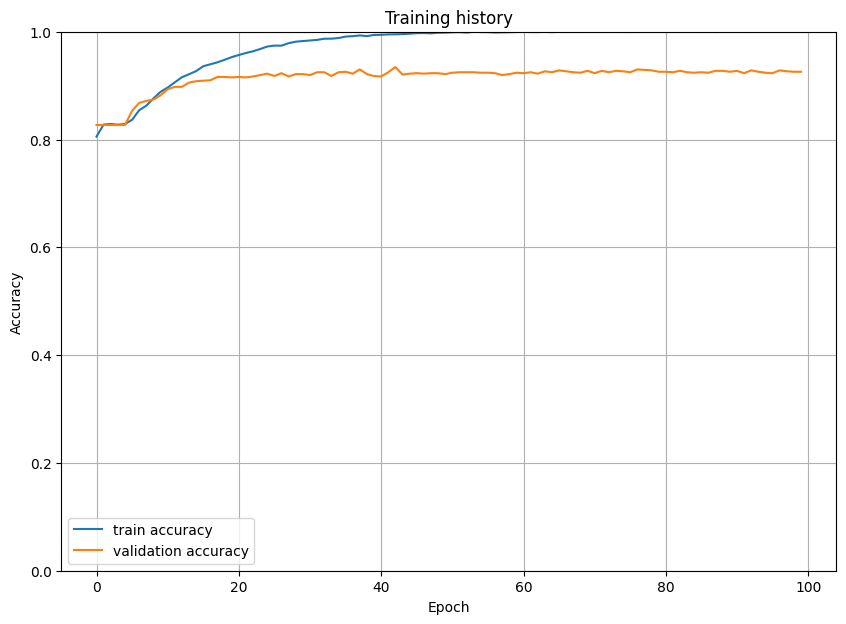

In [57]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.grid()

**Evaluation of the model**

In [58]:
# Loading pretrained model (best model)
model = BERTClass()
model.load_state_dict(torch.load("/kaggle/working/BERT_MODEL.bin"))
model = model.to(device)
     

In [59]:
# Evaluate the model using the test data
test_acc, test_loss = eval_model(test_data_loader, model, optimizer)

In [60]:

# The accuracy looks OK, similar to the validation accuracy
# The model generalizes well !
test_acc

0.9299698795180723

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
def get_predictions(model, data_loader):
    """
    Outputs:
      predictions - 
    """
    model = model.eval()
    
    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
        for data in data_loader:
            title = data["title"]
            ids = data["input_ids"].to(device, dtype = torch.long)
            mask = data["attention_mask"].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data["targets"].to(device, dtype = torch.float)

            outputs = model(ids, mask, token_type_ids)
            # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
            outputs = torch.sigmoid(outputs).detach().cpu()
            # thresholding at 0.5
            preds = outputs.round()
            targets = targets.detach().cpu()

            titles.extend(title)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            target_values.extend(targets)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)
    
    return titles, predictions, prediction_probs, target_values

In [63]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

In [64]:
# sanity check
predictions.numpy()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:332 
predictions:torch.Size([332, 8]) 
prediction_probs:torch.Size([332, 8]) 
target_values:torch.Size([332, 8])


In [66]:
# Generate Classification Metrics
#
# note that the total support is greater than the number of samples
# some samples have multiple lables

print(classification_report(target_values, predictions, target_names=target_list))

              precision    recall  f1-score   support

   packaging       0.85      0.87      0.86        67
       rider       1.00      0.70      0.82        10
      seller       0.90      0.91      0.90        67
       price       0.89      0.84      0.86        64
    delivery       0.93      0.62      0.74        65
     service       0.64      0.33      0.44        42
       shelf       0.94      1.00      0.97        30
     product       0.80      0.93      0.86       225

   micro avg       0.84      0.83      0.84       570
   macro avg       0.87      0.77      0.81       570
weighted avg       0.84      0.83      0.83       570
 samples avg       0.85      0.85      0.83       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



# > **Inference**

In [67]:
df_test

,reviewContent,packaging,rider,seller,price,delivery,service,shelf,product
519,প্যাকেটিং সহ পন্য খুবিই ভাল ছিল,1,0,0,0,0,0,0,1
1405,প্রস্তাবিত পণ্য,0,0,0,0,0,0,0,1
769,আলহামদুলিল্লাহ ভালো পর্ন্য আপনারা চাইলে নিতে প...,0,0,0,0,0,0,0,1
920,প্যাকেজিংটা অনেক ভালো ছিল কফিটাও ভালো কনটেইনার...,1,0,0,0,0,0,0,1
260,ঠিকমতো পেয়েছি এই জিনিস ব্যবহারে খাবারের স্বাদে...,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1380,"ধন্যবাদ দারাজ, আমাকে সময় মতো পার্সেলটা দেওয়া...",0,0,0,0,1,0,0,0
1339,খুব ভালো ছিল প্যাকেজিং,1,0,0,0,0,0,0,0
139,চমৎকার প্রোডাক্ট সম্প্রতি অন্য একটি বিক্রেতার ...,1,0,1,0,0,0,0,1
908,পর্যাপ্ত মেয়াদ{এক বছরের মেয়াদ ) সহ খুব ভালো অব...,1,0,1,0,0,0,1,0


In [68]:
df_test.reviewContent[221]

'আলহামদুলিল্লাহ ভালো অবস্থায় পেয়েছি'

In [69]:

# raw text
raw_text = """

আলহামদুলিল্লাহ 💖 ভালো অবস্থায় পেয়েছি। 😊

"""

raw_text = clean_text(raw_text)
print(raw_text)

আলহামদুলিল্লাহ ভালো অবস্থায় পেয়েছি


In [70]:
encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)
output = model(input_ids, attention_mask, token_type_ids)
 # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
output = torch.sigmoid(output).detach().cpu()
# thresholding at 0.5
output = output.flatten().round().numpy()
output

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2699: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [71]:
# Correctly identified the topic of the paper: High energy physics
print(f"Title: {raw_text}")
for idx, p in enumerate(output):
    if p==1:
        print(f"Label: {target_list[idx]}")

Title: আলহামদুলিল্লাহ ভালো অবস্থায় পেয়েছি
Label: packaging
